In [2]:
import numpy as np
from skfem import *
from skfem.supermeshing import intersect, elementwise_quadrature
from skfem.models.elasticity import (linear_elasticity, lame_parameters,
                                     linear_stress)
from skfem.helpers import dot, sym_grad, jump, mul
from skfem.io.json import from_file
from pathlib import Path
import pandas as pd 
import json 
import matplotlib.pyplot as plt 
from skfem.visuals.matplotlib import plot, draw
from stl import mesh
import skfem as fem 
from skfem.helpers import dot, grad 


<skfem MeshTri1 object>
  Number of elements: 6240
  Number of vertices: 3225
  Number of nodes: 3225
  Named subdomains [# elements]: domain [6240]
  Named boundaries [# facets]: dirichlet [200]


TypeError: 'WindowsPath' object is not subscriptable

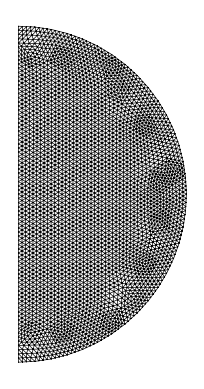

In [5]:


mesh_file = Path('ex04_mesh.json')
mesh_file2 = Path('test_mesh.json')
mesh_file

m1 = from_file(mesh_file).refined(2)
m2 = from_file(mesh_file2).refined(0)

print(m1)
draw(m1)
plt.scatter(mesh_file2['p'])

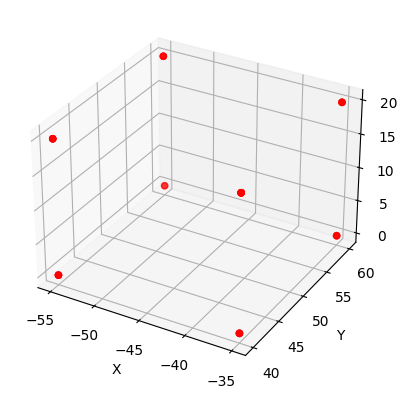

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_stl(file_path):
    points = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Iterate through the lines of the file
        for line in lines:
            # Split the line into its components
            components = line.split()

            # Check if the line represents a vertex (vertex lines start with "vertex")
            if len(components) >= 4 and components[0] == 'vertex':
                # Extract the x, y, and z coordinates of the vertex
                x = float(components[1])
                y = float(components[2])
                z = float(components[3])

                # Append the coordinates to the list of points
                points.append((x, y, z))

    return points

def plot_points_3d(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from points
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]

    # Plot points
    ax.scatter(x, y, z, c='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Beispielaufruf der Funktionen
file_path = 'Output.stl'  # Passe den Pfad zur deiner STL-Datei an
triangle_points = read_stl(file_path)
plot_points_3d(triangle_points)


In [7]:

import json
def generate_subdomains(points):
    subdomains = {'domain': list(range(len(points)))}
    return subdomains



def generate_tetrahedra(points):
    tetrahedra = []
    num_points = len(points)

    # Annahme: Es gibt mindestens vier Punkte für einen Tetraeder
    for i in range(0, num_points - 3, 4):
        tetrahedron = [i, i+1, i+2, i+3]
        tetrahedra.append(tetrahedron)

    return tetrahedra

def write_json(file_path, points, tetrahedra, subdomains):
    data = {'p': points, 't': tetrahedra, 'subdomains': subdomains}

    with open(file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

# Beispielaufruf der Funktionen
file_path = 'mesh_data.json'  # Dateipfad für die JSON-Datei

tetra_points = read_stl('Output.stl')# Annahme: 'beispiel.stl' ist der Dateiname deiner STL-Datei

tetra_subdomains = generate_subdomains(tetra_points)
tetra_tetrahedra = generate_tetrahedra(tetra_points)
write_json(file_path, tetra_points, tetra_tetrahedra, tetra_subdomains)



In [8]:
mesh_file = Path('mesh_data.json')
m1 = from_file(mesh_file).refined(2)
print(m1)
#base = fem.Basis(m1, MeshTet2())
draw(m1)

KeyError: 'boundaries'

exception (False, "b'\\xd7\\xd3@\\x00\\x00\\xa0\\xbf\\xdfo\\x9da\\x00\\x00\\xf95\\x7f\\xbf\\x0b\\xd5\\xc1&*\\xaf\\xa0=\\xa0\\x1a\\xd3@\\xbe\\x9f\\x9a\\xbf\\xc3\\xf5\\x9aa)\\\\\\xd3@\\xa4p\\x9d\\xbfj\\xbc\\x9bam\\xe7\\xd3@\\x00\\x00\\x00\\x00\\x12\\x83\\x9da\\x00\\x00\\xf95\\x7f\\xbf\\x86\\xaa\\xa9\\xa6*\\xaf\\xa0=)\\\\\\xd3@\\xa4p\\x9d\\xbfj\\xbc\\x9ba\\x81\\x95\\xd3@d;\\x9f\\xbf\\x1f\\x85\\x9cam\\xe7\\xd3@\\x00\\x00\\x00\\x00\\x12\\x83\\x9da\\x00\\x00\\xf95\\x7f\\xbf\\x1b\\x82\\x80%*\\xaf\\xa0=m\\xe7\\xd3@\\x00\\x00\\x00\\x00\\x12\\x83\\x9da\\x81\\x95\\xd3@d;\\x9f\\xbf\\x1f\\x85\\x9ca' should start with b'facet normal'")


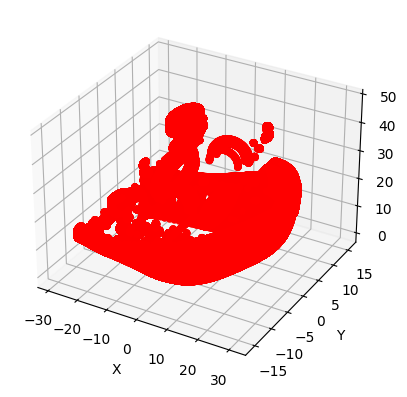

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from meshio.stl  import _stl
import stl

your_mesh = mesh.Mesh.from_file('3DBenchy.stl')
your_mesh.save('TestBenchy.stl',mode=stl.Mode.ASCII)

def read_stl(file_path):
    points = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Iterate through the lines of the file
        for line in lines:
            # Split the line into its components
            components = line.split()

            # Check if the line represents a vertex (vertex lines start with "vertex")
            if len(components) >= 4 and components[0] == 'vertex':
                # Extract the x, y, and z coordinates of the vertex
                x = float(components[1])
                y = float(components[2])
                z = float(components[3])

                # Append the coordinates to the list of points
                points.append((x, y, z))

    return points

def plot_points_3d(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from points
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]

    # Plot points
    ax.scatter(x, y, z, c='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Beispielaufruf der Funktionen
file_path = 'TestBenchy.stl'  # Passe den Pfad zur deiner STL-Datei an
triangle_points = read_stl(file_path)
plot_points_3d(triangle_points)

In [46]:

import json
def generate_subdomains(points):
    subdomains = {'domain': list(range(len(points)))}
    return subdomains



def generate_tetrahedra(points):
    tetrahedra = []
    num_points = len(points)

    # Annahme: Es gibt mindestens vier Punkte für einen Tetraeder
    for i in range(0, num_points - 3, 4):
        tetrahedron = [i, i+1, i+2, i+3]
        tetrahedra.append(tetrahedron)

    return tetrahedra

def write_json(file_path, points, tetrahedra, subdomains):
    data = {'p': points, 't': tetrahedra, 'subdomains': subdomains}

    with open(file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

# Beispielaufruf der Funktionen
file_path = 'mesh_Benchy.json'  # Dateipfad für die JSON-Datei

tetra_points = read_stl('TestBenchy.stl')# Annahme: 'beispiel.stl' ist der Dateiname deiner STL-Datei

tetra_subdomains = generate_subdomains(tetra_points)
tetra_tetrahedra = generate_tetrahedra(tetra_points)
write_json(file_path, tetra_points, tetra_tetrahedra, tetra_subdomains)

KeyboardInterrupt: 

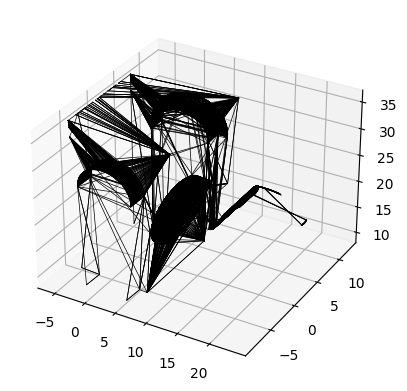

In [11]:
mesh_file = Path('mesh_Benchy.json')
mesh = from_file(mesh_file)


mesh


